In [162]:
import pandas as pd
import statistics as sts
import seaborn as srn
import numpy as np

In [163]:
df = pd.read_csv("tempo.csv")
df.columns.to_list()

['Aparencia;Temperatura;Umidade;Vento;Jogar']

In [164]:
df.head()

,Aparencia;Temperatura;Umidade;Vento;Jogar
0,sol;85;85;FALSO;nao
1,sol;80;90;VERDADEIRO;nao
2,nublado;83;86;FALSO;sim
3,chuva;70;;FALSO;sim
4,chuva;68;80;FALSO;sim


In [165]:
nparray = df['Aparencia;Temperatura;Umidade;Vento;Jogar'].str.split(";").to_list()
df = pd.DataFrame(nparray)

In [166]:
df.columns = ['Aparencia','Temperatura','Umidade','Vento','Jogar']
df

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85,FALSO,nao
1,sol,80,90,VERDADEIRO,nao
2,nublado,83,86,FALSO,sim
3,chuva,70,,FALSO,sim
4,chuva,68,80,FALSO,sim
5,chuva,65,70,VERDADEIRO,nao
6,menos,64,65,VERDADEIRO,sim
7,sol,1220,95,FALSO,nao
8,sol,69,70,FALSO,sim
9,chuva,75,200,,sim


In [167]:
grup = df.groupby(["Aparencia"]).size()
grup

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

<Axes: xlabel='Aparencia'>

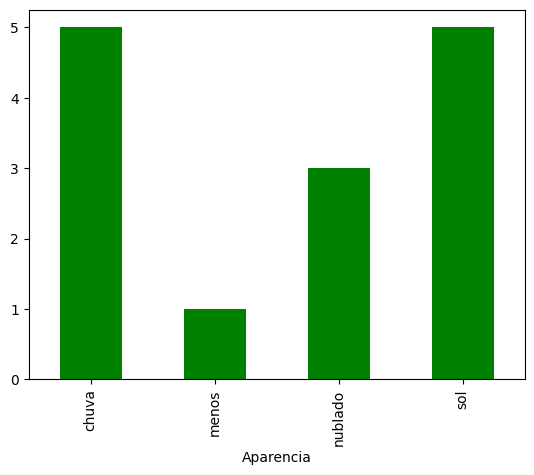

In [168]:
grup.plot.bar(color="Green")

In [169]:
grup = df.groupby(["Vento"]).size()
grup

Vento
              1
FALSO         7
VERDADEIRO    6
dtype: int64

<Axes: xlabel='Vento'>

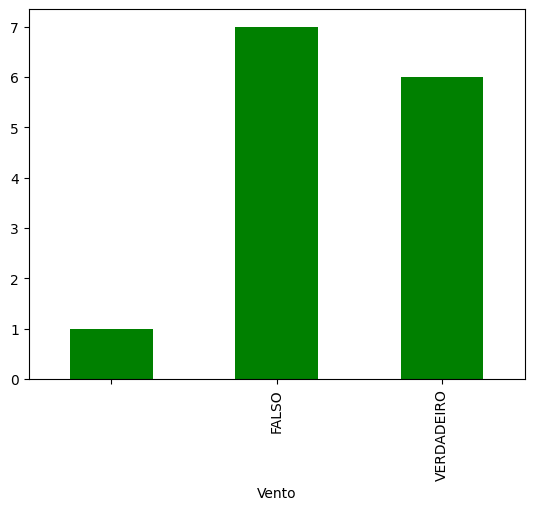

In [170]:
grup.plot.bar(color="Green")

In [171]:
grup = df.groupby(["Jogar"]).size()
grup

Jogar
nao    5
sim    9
dtype: int64

<Axes: xlabel='Jogar'>

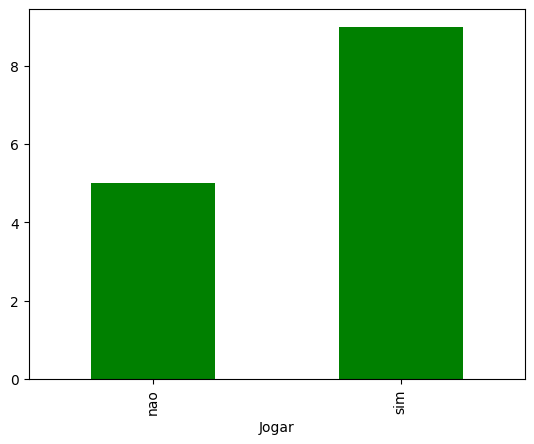

In [172]:
grup.plot.bar(color="Green")

In [173]:
df["Temperatura"] = df["Temperatura"].astype(float)


In [174]:
df["Temperatura"].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

<Axes: ylabel='Temperatura'>

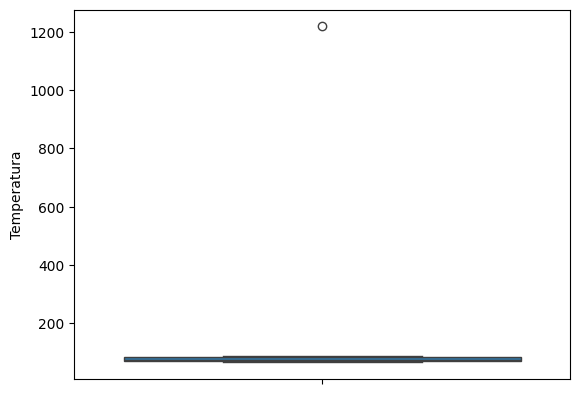

In [176]:
srn.boxplot(df["Temperatura"])


<Axes: xlabel='Temperatura', ylabel='Count'>

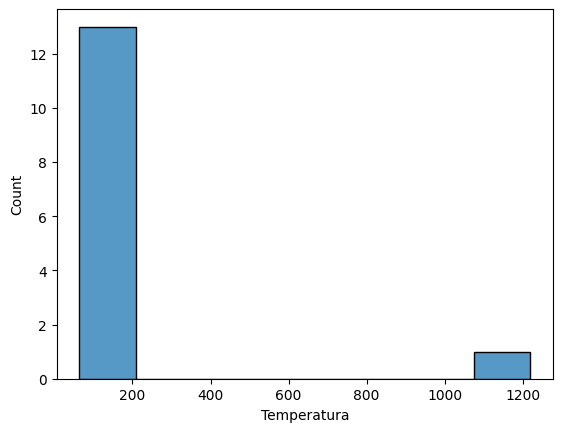

In [177]:
srn.histplot(df["Temperatura"])

In [194]:
df["Umidade"] = df["Umidade"].replace(r"[^0-9], [\s]",np.nan,regex=True)
df["Umidade"] = df["Umidade"].replace("",np.nan,regex=True)

df["Umidade"] = df["Umidade"].astype(float)


In [195]:
df["Umidade"].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

<Axes: ylabel='Umidade'>

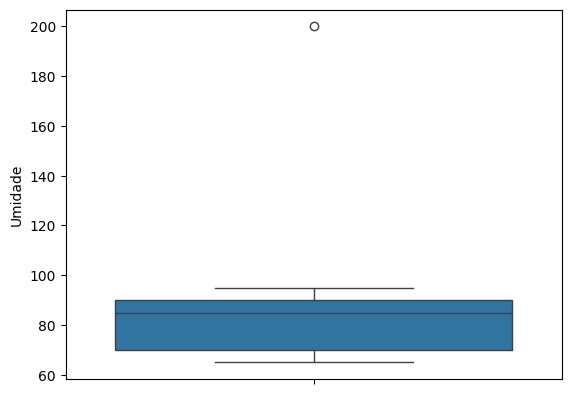

In [196]:
srn.boxplot(df["Umidade"])

<Axes: xlabel='Umidade', ylabel='Count'>

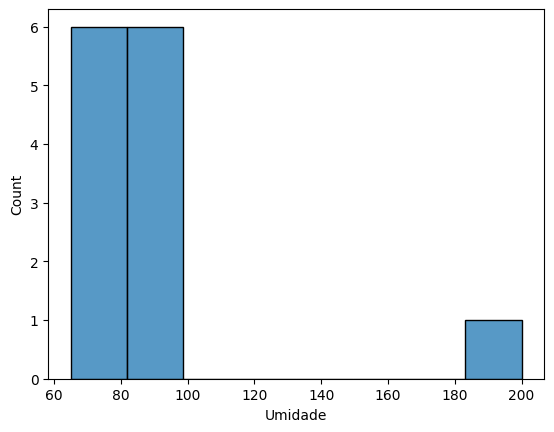

In [198]:
srn.histplot(df["Umidade"])

In [200]:
"Tratamento colunas aparencia e vento"

"""Aparencia"""

sts.mode(df["Aparencia"])

'sol'

<Axes: xlabel='Aparencia'>

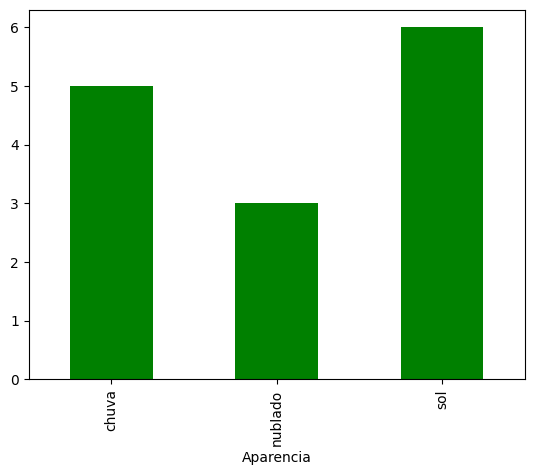

In [209]:
df.groupby(["Aparencia"]).size().plot.bar(color="green")


In [203]:
df.loc[df["Aparencia"] == "menos", "Aparencia"] = sts.mode(df["Aparencia"])

<Axes: xlabel='Vento'>

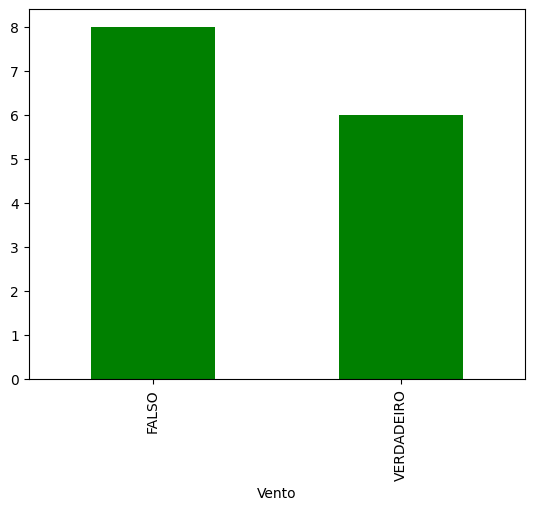

In [208]:
df.groupby(["Vento"]).size().plot.bar(color="green")

In [205]:
df.loc[df["Vento"]== "","Vento"] = sts.mode(df["Vento"])

<Axes: xlabel='Temperatura', ylabel='Count'>

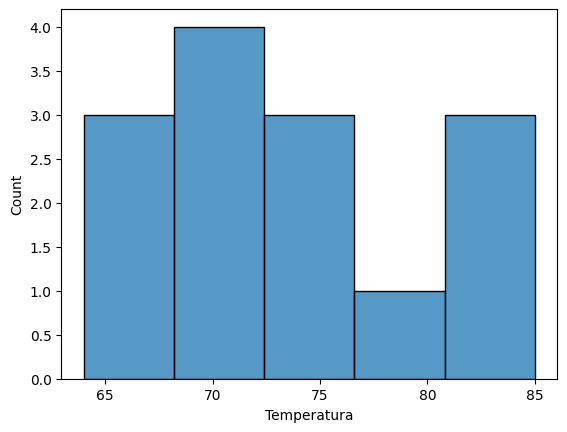

In [218]:
srn.histplot(df["Temperatura"])

In [212]:
df.loc[df["Temperatura"].isna(), "Temperatura"] = sts.median(df["Temperatura"])
df.loc[df["Temperatura"]> 150, "Temperatura"] = sts.median(df["Temperatura"])

<Axes: xlabel='Umidade', ylabel='Count'>

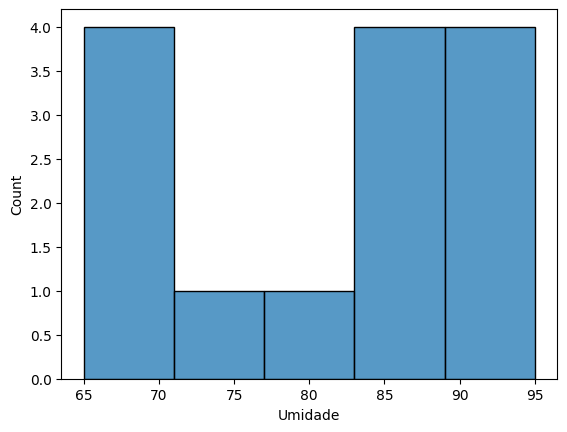

In [217]:
srn.histplot(df["Umidade"])

In [215]:
df.loc[df["Umidade"].isna(), "Umidade"] = sts.median(df["Umidade"])
df.loc[df["Umidade"]> 100, "Umidade"] = sts.median(df["Umidade"])

In [ ]:
df 

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.00,FALSO,nao
1,sol,80.0,90.00,VERDADEIRO,nao
2,nublado,83.0,86.00,FALSO,sim
3,chuva,70.0,85.50,FALSO,sim
4,chuva,68.0,80.00,FALSO,sim
5,chuva,65.0,70.00,VERDADEIRO,nao
6,sol,64.0,65.00,VERDADEIRO,sim
7,sol,73.5,95.00,FALSO,nao
8,sol,69.0,70.00,FALSO,sim
9,chuva,75.0,85.25,FALSO,sim


In [219]:
df.to_csv("tempo_cleened.csv",index=False)